In [39]:
import pandas as pd
from dataset_manager import DatasetManager

# 1 - Load de dados

In [7]:
dataset_path = "./datasets"
manager = DatasetManager(dataset_path)
manager.show_datasets()

,description,format,identifier,local_source,source
0,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2008,./data/media_alunos_2008,http://download.inep.gov.br/informacoes_estati...
1,Quantidade de creches e pré-escolas cujas obra...,json,construcao_creche,./data/construcao_creche.json,http://api.pgi.gov.br/api/1/serie/2620.json
2,Quantidade de projetos para a construção de cr...,json,aprovacao_construcao_creche,./data/aprovacao_construcao_creche.json,http://api.pgi.gov.br/api/1/serie/2555.json
3,Valor do investimento para a construção das cr...,json,investimento_em_construcao_creche,./data/investimento_em_construcao_creche.json,http://api.pgi.gov.br/api/1/serie/1703.json
4,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2010,./data/media_alunos_2010,http://download.inep.gov.br/informacoes_estati...
5,Média de alunos por turmas em escolas e creche...,zip xls,media_alunos_2009,./data/media_alunos_2009,http://download.inep.gov.br/informacoes_estati...


In [12]:
manager.prepare_dataset()

04-29 20:25 - DatasetManager - prepare_dataset - INFO - Preparing media_alunos_2008 ...
04-29 20:25 - DataSource - download - DEBUG - media_alunos_2008 is not chached. Downloading ...
04-29 20:25 - urllib3.connectionpool - _new_conn - DEBUG - Starting new HTTP connection (1): download.inep.gov.br:80
04-29 20:25 - urllib3.connectionpool - _make_request - DEBUG - http://download.inep.gov.br:80 "GET /informacoes_estatisticas/2011/indicadores_educacionais/media_alunos_turma/2008/media_alunos_turma_municipios_2008.zip HTTP/1.1" 200 5268098
04-29 20:25 - DataSource - download - DEBUG - media_alunos_2008 Downloaded!
04-29 20:25 - DataSource - unzip_file - DEBUG - Unzipping media_alunos_2008 ...
04-29 20:25 - DataSource - unzip_file - DEBUG - media_alunos_2008 unzipped!
04-29 20:25 - DatasetManager - prepare_dataset - INFO - media_alunos_2008 is ready to use!
04-29 20:25 - DatasetManager - prepare_dataset - INFO - Preparing construcao_creche ...
04-29 20:25 - DataSource - download - DEBUG - co

# 2 - Ler dataset de media de alunos

In [13]:
datasets_keys = [x for x in manager.get_datasets() if x.startswith("media_alunos")]

In [43]:
def read_dataset(identifier):
    datasets = manager.load_as_pandas(identifier, sheet_name=[0,1])
    return pd.concat(datasets)

In [44]:
alunos_2008 = read_dataset(datasets_keys[0])
alunos_2009 = read_dataset(datasets_keys[1])
alunos_2010 = read_dataset(datasets_keys[2])

In [45]:
alunos = pd.concat([alunos_2008,alunos_2009, alunos_2010])

# 3 - Renomear colunas

In [46]:
def renamed(df):
    df_renamed = df.rename(
        columns={
            "Unnamed: 0" : "ano",
            "Ministério da Educação":"regiao",
            "Unnamed: 2":"estado",
            "Unnamed: 3" : "cod_municipio",
            "Unnamed: 4" : "municipio",
            "Unnamed: 5" : "localizacao",
            "Unnamed: 6" : "rede",
            "Unnamed: 7" : "media_alunos_etapa",
            "Unnamed: 8" : "rede",
            "Unnamed: 7" : "educacao_infantil - total",
            "Unnamed: 8" : "educacao_infantil - creche",
            "Unnamed: 9" : "educacao_infantil - pre-escola",
            "Unnamed: 10" : "ensino_fundamental - total",
            "Unnamed: 11" : "ensino_fundamental - anos_inic",
            "Unnamed: 12" : "ensino_fundamental - anos_finais",
            "Unnamed: 13" : "ensino_fundamental - 1ano",
            "Unnamed: 14" : "ensino_fundamental - 2ano",
            "Unnamed: 15" : "ensino_fundamental - 3ano",
            "Unnamed: 16" : "ensino_fundamental - 4ano",
            "Unnamed: 17" : "ensino_fundamental - 5ano",
            "Unnamed: 18" : "ensino_fundamental - 6ano",
            "Unnamed: 19" : "ensino_fundamental - 7ano",
            "Unnamed: 20" : "ensino_fundamental - 8ano",
            "Unnamed: 21" : "ensino_fundamental - 9ano",
            "Unnamed: 22" : "turmas_unificadas",
            "Unnamed: 23" : "ensino_medio - total_media",
            "Unnamed: 24" : "ensino_medio - 1ano",
            "Unnamed: 25" : "ensino_medio - 2ano",
            "Unnamed: 26" : "ensino_medio - 3ano",
            "Unnamed: 27" : "ensino_medio - 4ano",
            "Unnamed: 28" : "medio_nao_seriado"
        }
    )
    return df_renamed

In [47]:
alunos_renamed = renamed(alunos)

# 4 - Filtro

In [48]:
def filter_df(df):
    df_renamed_filtred = df[
        (~df["municipio"].isnull()) & 
        (df["ano"] != "Ano")]
    
    df_clean = df_renamed_filtred[["ano",
                        "estado",
                        "municipio",
                        "localizacao",
                        "rede",
                        "educacao_infantil - creche",
                        "educacao_infantil - pre-escola"]]
    
    return df_clean

In [49]:
alunos_filtered = filter_df(alunos_renamed)

## Filtro alunos apenas no `Rio de Janeiro`

In [51]:
def city_filter(city_name, state_name):
    alunos = alunos_filtered[ (alunos_filtered["municipio"] == city_name) &
                              (alunos_filtered["estado"] == state_name)]
    return alunos[alunos["localizacao"] == "Total"]

In [62]:
alunos_rj = city_filter("RIO DE JANEIRO", "RJ")

In [63]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")

In [64]:
alunos_rj

ano estado       municipio localizacao       rede  \
1 12037  2008     RJ  RIO DE JANEIRO       Total      Total   
  12038  2008     RJ  RIO DE JANEIRO       Total    Federal   
  12039  2008     RJ  RIO DE JANEIRO       Total   Estadual   
  12040  2008     RJ  RIO DE JANEIRO       Total  Municipal   
  12041  2008     RJ  RIO DE JANEIRO       Total    Privada   
  12042  2008     RJ  RIO DE JANEIRO       Total    Publico   
  11935  2010     RJ  RIO DE JANEIRO       Total      Total   
  11936  2010     RJ  RIO DE JANEIRO       Total    Federal   
  11937  2010     RJ  RIO DE JANEIRO       Total   Estadual   
  11938  2010     RJ  RIO DE JANEIRO       Total  Municipal   
  11939  2010     RJ  RIO DE JANEIRO       Total    Privada   
  11940  2010     RJ  RIO DE JANEIRO       Total    Publico   
  11980  2009     RJ  RIO DE JANEIRO       Total      Total   
  11981  2009     RJ  RIO DE JANEIRO       Total    Federal   
  11982  2009     RJ  RIO DE JANEIRO       Total   Estadual   
  11983  2009     RJ  RIO DE JANEIRO       Total  Municipal   
  11984  2009     RJ  RIO DE JANEIRO       Total    Privada   
  11985  2009     RJ  RIO DE JANEIRO       Total    Publico   

        educacao_infantil - creche educacao_infantil - pre-escola  
1 12037                       16.4                             18  
  12038                       17.3                           20.6  
  12039                       14.7                           15.3  
  12040                       22.8                           23.8  
  12041                       13.6                           12.7  
  12042                       22.6                           23.7  
  11935                       16.3                           16.9  
  11936                       14.1                           15.2  
  11937                         18                           15.3  
  11938                       22.7                           22.9  
  11939                       13.3                           12.8  
  11940                       22.5                           22.8  
  11980                       16.2                           17.8  
  11981                       14.8                           14.8  
  11982                       14.5                           14.1  
  11983                       22.7                           23.5  
  11984                       13.2                           12.9  
  11985                       22.5                           23.4

## 5 -  Media de alunos em turmas nas criches da cidade do `Rio De Janeiro`

04-29 20:45 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-29 20:45 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-29 20:45 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-29 20:45 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos
04-29 20:45 - matplotlib.axes._base - _update_title_position - DEBUG - update_title_pos


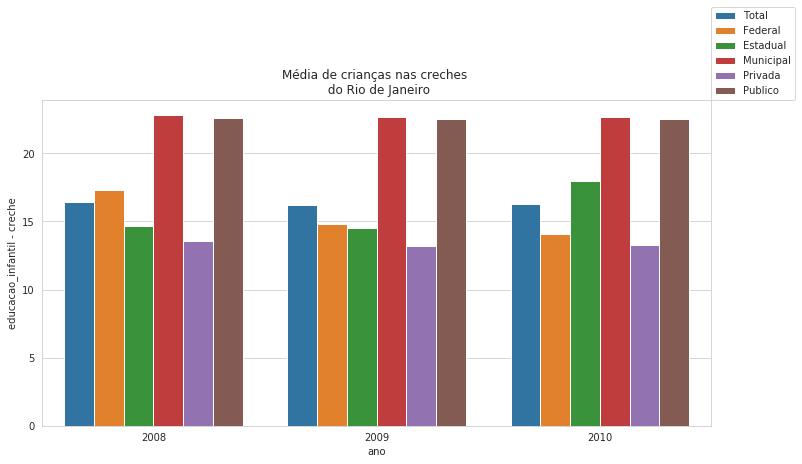

In [65]:
plt.subplots(figsize=(12,6))
plt.title("Média de crianças nas creches \n do Rio de Janeiro")

sns.barplot(x="ano",
            y="educacao_infantil - creche",
            hue="rede",
            data=alunos_rj,
            ci=None)
plt.legend(loc=[1,1])


# 6 - Comparação entreo o `Rio de Janeiro` e outras cidades

In [89]:
def clean_alunos_filtered_by_year(year, state=None, city=None):

    base_filter = ((alunos_filtered["educacao_infantil - creche"] != "--") &
                                       (alunos_filtered["rede"] == "Municipal") &
                                       (alunos_filtered["localizacao"] == "Total"))
    if state:
        base_filter = base_filter & (alunos_filtered["estado"] == state)
    
    if year:
        base_filter = base_filter & (alunos_filtered["ano"] == year)
    
    if city:
        base_filter = base_filter & (alunos_filtered["municipio"] == city)

    return alunos_filtered[base_filter]

In [107]:
def alunos_rank_rj(year):
    alunos_rj_year = clean_alunos_filtered_by_year(year,"RJ")
    alunos_rj_year.loc[:,'rank'] = alunos_rj_year["educacao_infantil - creche"].rank(ascending = False) 
    return alunos_rj_year

In [110]:
alunos_rank_rj(2010)

ano estado                    municipio localizacao       rede  \
1 11031  2010     RJ               ANGRA DOS REIS       Total  Municipal   
  11047  2010     RJ                      APERIBE       Total  Municipal   
  11060  2010     RJ                     ARARUAMA       Total  Municipal   
  11074  2010     RJ                        AREAL       Total  Municipal   
  11087  2010     RJ           ARMACAO DOS BUZIOS       Total  Municipal   
  11097  2010     RJ              ARRAIAL DO CABO       Total  Municipal   
  11107  2010     RJ               BARRA DO PIRAI       Total  Municipal   
  11119  2010     RJ                  BARRA MANSA       Total  Municipal   
  11134  2010     RJ                 BELFORD ROXO       Total  Municipal   
  11144  2010     RJ                   BOM JARDIM       Total  Municipal   
  11159  2010     RJ      BOM JESUS DO ITABAPOANA       Total  Municipal   
  11176  2010     RJ                    CABO FRIO       Total  Municipal   
  11190  2010     RJ         CACHOEIRAS DE MACACU       Total  Municipal   
  11205  2010     RJ                      CAMBUCI       Total  Municipal   
  11230  2010     RJ    COMENDADOR LEVY GASPARIAN       Total  Municipal   
  11244  2010     RJ        CAMPOS DOS GOYTACAZES       Total  Municipal   
  11273  2010     RJ              CARDOSO MOREIRA       Total  Municipal   
  11286  2010     RJ                        CARMO       Total  Municipal   
  11299  2010     RJ            CASIMIRO DE ABREU       Total  Municipal   
  11313  2010     RJ          CONCEICAO DE MACABU       Total  Municipal   
  11327  2010     RJ                     CORDEIRO       Total  Municipal   
  11340  2010     RJ                  DUAS BARRAS       Total  Municipal   
  11355  2010     RJ              DUQUE DE CAXIAS       Total  Municipal   
  11371  2010     RJ  ENGENHEIRO PAULO DE FRONTIN       Total  Municipal   
  11384  2010     RJ                   GUAPIMIRIM       Total  Municipal   
  11398  2010     RJ                IGUABA GRANDE       Total  Municipal   
  11411  2010     RJ                     ITABORAI       Total  Municipal   
  11426  2010     RJ                      ITAGUAI       Total  Municipal   
  11440  2010     RJ                       ITALVA       Total  Municipal   
  11454  2010     RJ                     ITAOCARA       Total  Municipal   
...       ...    ...                          ...         ...        ...   
  11860  2010     RJ                     QUISSAMA       Total  Municipal   
  11874  2010     RJ                      RESENDE       Total  Municipal   
  11888  2010     RJ                   RIO BONITO       Total  Municipal   
  11901  2010     RJ                    RIO CLARO       Total  Municipal   
  11912  2010     RJ               RIO DAS FLORES       Total  Municipal   
  11923  2010     RJ               RIO DAS OSTRAS       Total  Municipal   
  11938  2010     RJ               RIO DE JANEIRO       Total  Municipal   
  11951  2010     RJ         SANTA MARIA MADALENA       Total  Municipal   
  11964  2010     RJ       SANTO ANTONIO DE PADUA       Total  Municipal   
  11977  2010     RJ  SAO FRANCISCO DE ITABAPOANA       Total  Municipal   
  11992  2010     RJ                  SAO FIDELIS       Total  Municipal   
  12006  2010     RJ                  SAO GONCALO       Total  Municipal   
  12022  2010     RJ            SAO JOAO DA BARRA       Total  Municipal   
  12036  2010     RJ           SAO JOAO DE MERITI       Total  Municipal   
  12046  2010     RJ              SAO JOSE DE UBA       Total  Municipal   
  12070  2010     RJ          SAO PEDRO DA ALDEIA       Total  Municipal   
  12083  2010     RJ        SAO SEBASTIAO DO ALTO       Total  Municipal   
  12094  2010     RJ                     SAPUCAIA       Total  Municipal   
  12107  2010     RJ                    SAQUAREMA       Total  Municipal   
  12122  2010     RJ                   SEROPEDICA       Total  Municipal   
  12138  2010     RJ                 SILVA JARDIM       To

In [98]:
clean_alunos_filtered.sort_values("educacao_infantil - creche", ascending=False)

TypeError: sort_values() missing 1 required positional argument: 'by'

In [81]:
clean_alunos_filtered.sort_values?